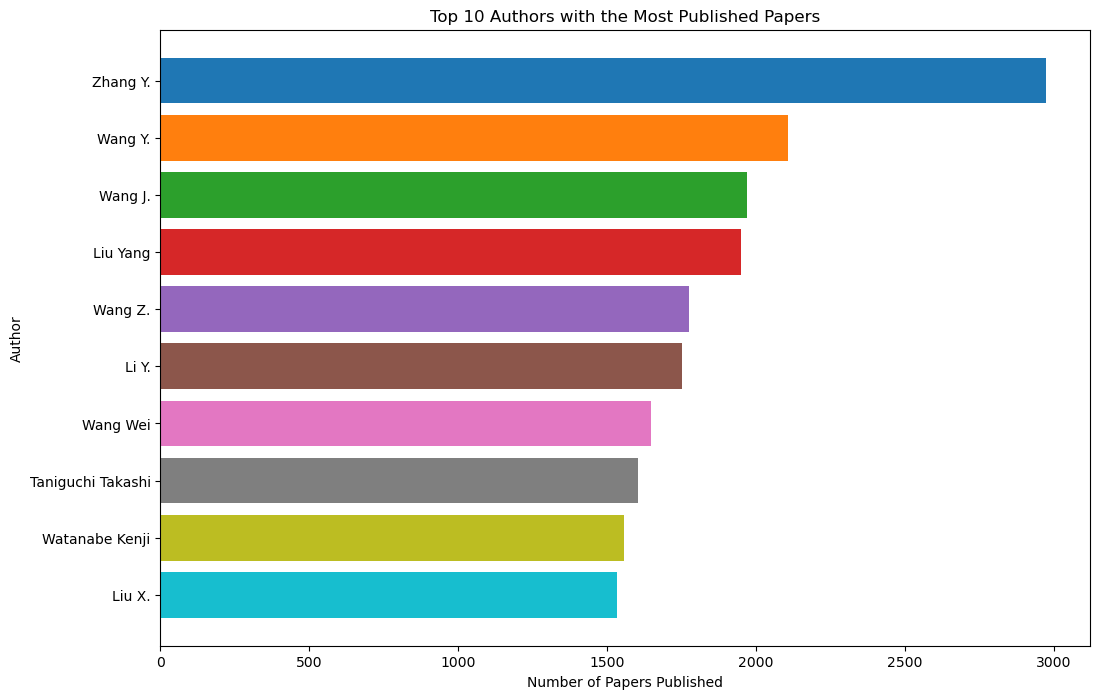

In [4]:
import json
from matplotlib import pyplot as plt
import pandas as pd

# Load the JSON data from the file
with open('../spark_output/author_paper_count.json', 'r', encoding='utf-8') as file:
    data = [json.loads(line) for line in file]

# Create a DataFrame from the loaded data
df = pd.DataFrame(data)

# Find the top 10 authors with the most published papers
top_10_authors = df.nlargest(10, 'count')

# Plot the data with different colors for each bar using 'tab10' colormap
colors = plt.get_cmap('tab10').colors

plt.figure(figsize=(12, 8))
bars = plt.barh(top_10_authors['author'], top_10_authors['count'], color=colors[:len(top_10_authors)])
plt.xlabel('Number of Papers Published')
plt.ylabel('Author')
plt.title('Top 10 Authors with the Most Published Papers')
plt.gca().invert_yaxis()  # Invert y-axis to have the author with the most papers at the top
plt.show()


/var/folders/vc/xr3_j3fd4fs4rq8tkll3czl00000gn/T/ipykernel_7866/2869153675.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_df['year'] = top_df['year'].astype(int)


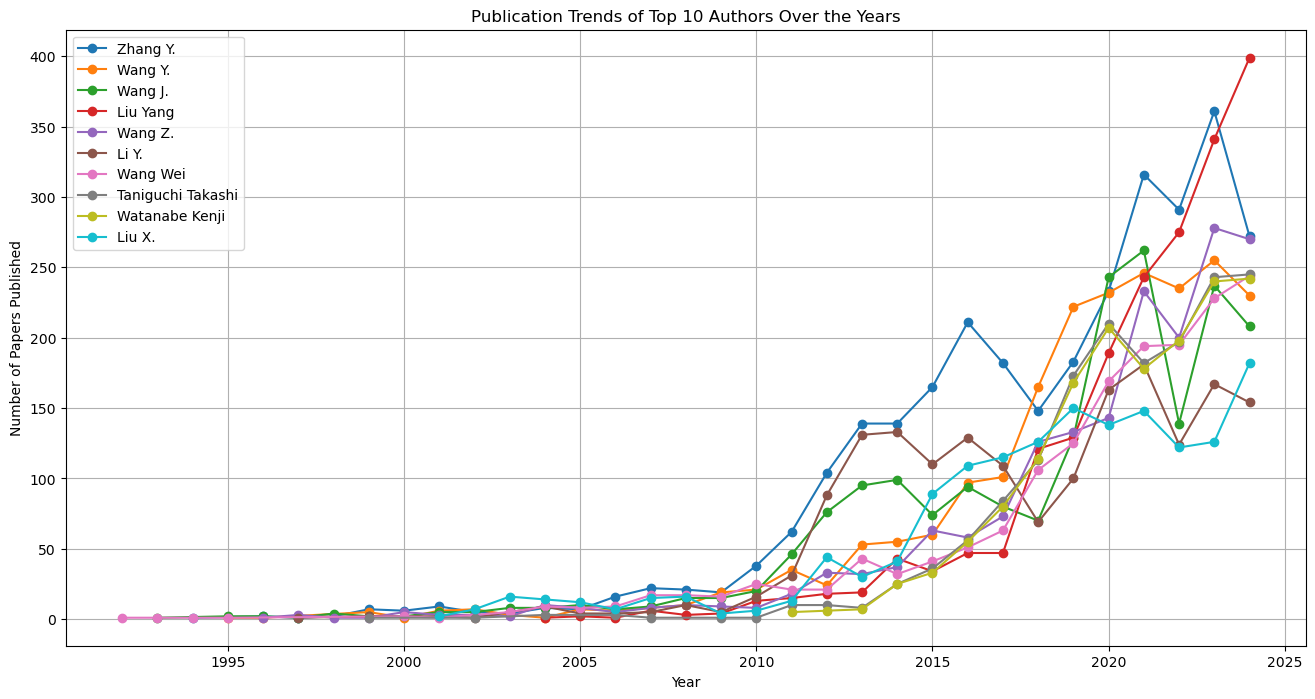

In [2]:
import json
from matplotlib import pyplot as plt
import pandas as pd

# Load the JSON data from the file
with open('../spark_output/author_paper_yearly_count.json', 'r', encoding='utf-8') as file:
    data = [json.loads(line) for line in file]

# Create a DataFrame from the loaded data
df = pd.DataFrame(data)

# Find the top 10 authors with the most published papers
top_authors = df.groupby('author')['count'].sum().nlargest(10).index

# Filter the DataFrame to include only the top 10 authors
top_df = df[df['author'].isin(top_authors)]

# Convert 'year' column to integer for correct plotting
top_df['year'] = top_df['year'].astype(int)

# Plot the data
plt.figure(figsize=(16, 8))
for author in top_authors:
    author_data = top_df[top_df['author'] == author].sort_values(by='year')
    plt.plot(author_data['year'], author_data['count'], marker='o', label=author)

plt.xlabel('Year')
plt.ylabel('Number of Papers Published')
plt.title('Publication Trends of Top 10 Authors Over the Years')
plt.legend()
plt.grid(True)
plt.show()